# Отчет по лабораторной работе №1 "Кэш процессора"

## Постановка задачи

В рамках лабораторной работы была произведена серия численных экспериментов, чтобы исследовать влияние конфигурации кэша на время выполнения вычислений. В качестве численного эксперимента было взято умножение матриц, реализованное с использованием трех алгоритмов:
* **Simple**
* **Block**
* **Swapped**


Были проведены следующие эксперименты с упомянутыми алгоритмами:
1. Умножение квадратных float-матриц с n от 1000 до 1100
1. Умножение квадратных double-матриц с n от 1000 до 1100
1. Умножение квадратных float-матриц с n от 1000 до 2000 с шагом 10
1. Умножение квадратных double-матриц с n от 1000 до 2000 с шагом 10     

## Конфигурация используемых машин
1. **Linux Ubuntu 16.04**
     
    *Compilator:* gcc version 5.4.0 20160609
    
    *CPU/Cache:*
    
    ```
     Processor:
         Intel(R) Core(TM)2 Quad CPU    Q8400  @ 2.66GHz
     Cores: 4
     Cache:
         L1 Instruction cache: 32KB, 8-way associative. 64 byte line size.
         L1 Data cache: 32KB, 8-way associative. 64 byte line size.
         L2 cache: 2MB, 8-way associative. 64 byte line size
    ```
2. **OS X El Capitan 10.11.6**
  
    *Compilator:* Apple LLVM version 8.0.0 (clang-800.0.38)
    
    *CPU/Cache:*
        
    ```
     Processor:
         Intel(R) Core(TM) i5-4258U CPU @ 2.40GHz
     Cores: 2 (2 logical cores per physical)
     Cache:
         L1 Data Cache
            Size                  : 32K
            Line Size             : 64B
            Sharing               : shared between 2 processor threads
            Sets                  : 64
            Partitions            : 1
            Associativity         : 8
         L2 Unified Cache
            Size                  : 256K
            Line Size             : 64B
            Sharing               : shared between 2 processor threads
            Sets                  : 512
            Partitions            : 1
            Associativity         : 8
         L3 Unified Cache
            Size                  : 3M
            Line Size             : 64B
            Sharing               : shared between 16 processor threads
            Sets                  : 4096
            Partitions            : 1
            Associativity         : 12
    ```

## Код обработки лог-файлов и построения графиков на языке Python

### Парсинг результатов эксперимента

In [1]:
import matplotlib.pyplot as plt

In [2]:
def parse_results(path):
    def _retrieve_time(str_line):
        return float(str_line.split(":")[1].strip())

    simple = {}
    block = {}
    swapped = {}
    n = 0

    for line in open(path):
        if line.startswith("n ="):
            n = int(line[3:].strip())
        elif line.startswith("timeSimple"):
            simple[n] = _retrieve_time(line)
        elif line.startswith("timeBlock"):
            block[n] = _retrieve_time(line)
        elif line.startswith("timeSwapped"):
            swapped[n] = _retrieve_time(line)

    results = dict()
    results["Simple"] = simple
    results["Block"] = block
    results["Swapped"] = swapped
    return results

### Построение графика

In [3]:
def generate_plot(data):
    ax = plt.figure(figsize=(20, 5)).add_subplot(111)
    for algo in data:
        keys = sorted(list(data[algo].keys()))
        values = [data[algo][key] for key in keys]
        ax.plot(keys, values)
        ax.legend([key for key in data], loc='upper left')

    first_key = next(iter(data.keys()))
    ticks = sorted(list(data[first_key].keys()))

    plt.tick_params(axis='both', labelsize=8)
    plt.xticks(ticks, rotation='vertical')
    plt.xlabel('n')
    plt.ylabel('time, s')
    plt.grid(True)
    plt.show()


### Обработка лог-файла и сохранение графиков в виде .png файла

In [4]:
def run(path_to_log_file):
    base_filename = path_to_log_file.split("/")[-1].split(".")[0]
    all_result = parse_results(path_to_log_file)
    generate_plot(all_result)

    simple_result = {"Simple": all_result["Simple"]}
    generate_plot(simple_result)

    block_result = {"Block": all_result["Block"]}
    generate_plot(block_result)

    swapped_result = {"Swapped": all_result["Swapped"]}
    generate_plot(swapped_result)

## Результаты

### Linux

### 1. FLOAT from 1000 to 1100

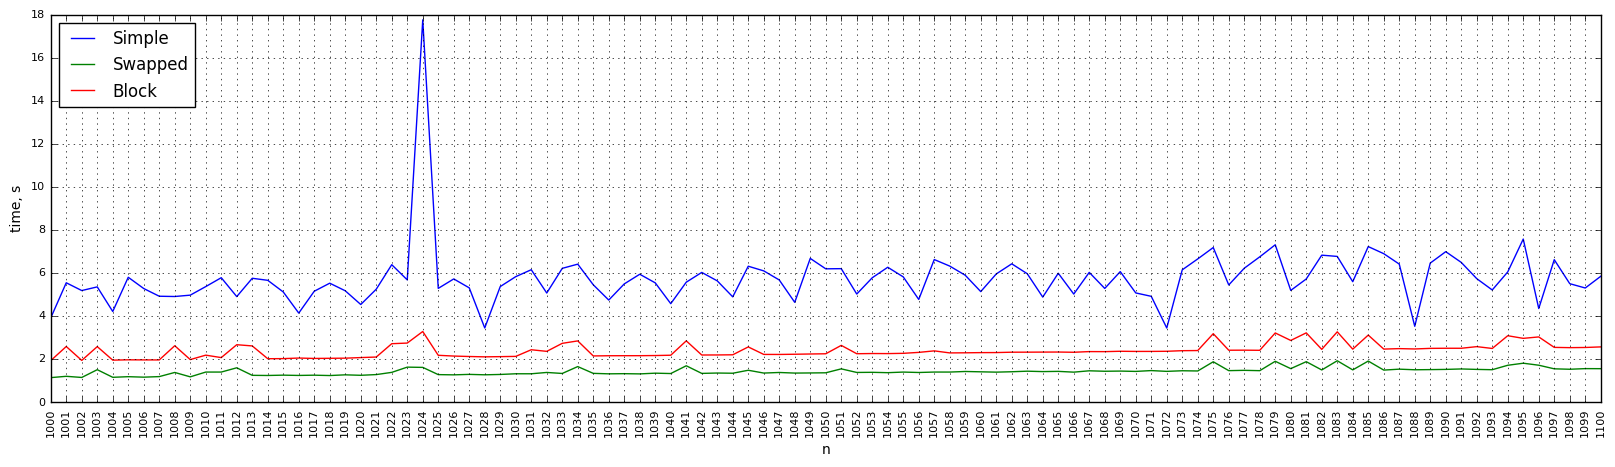

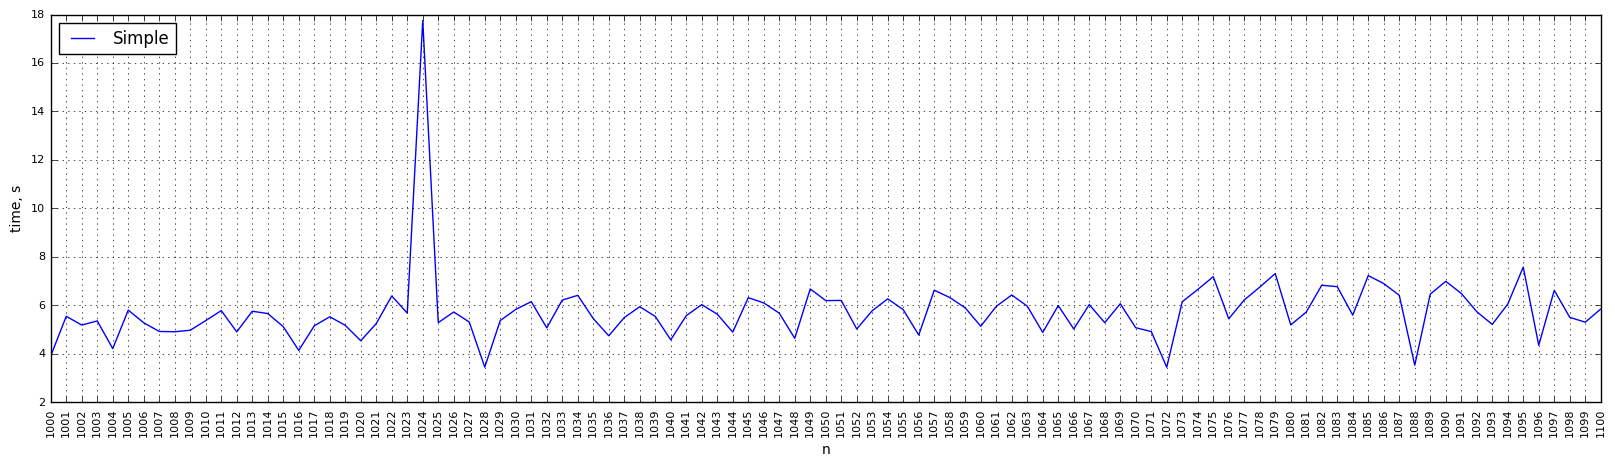

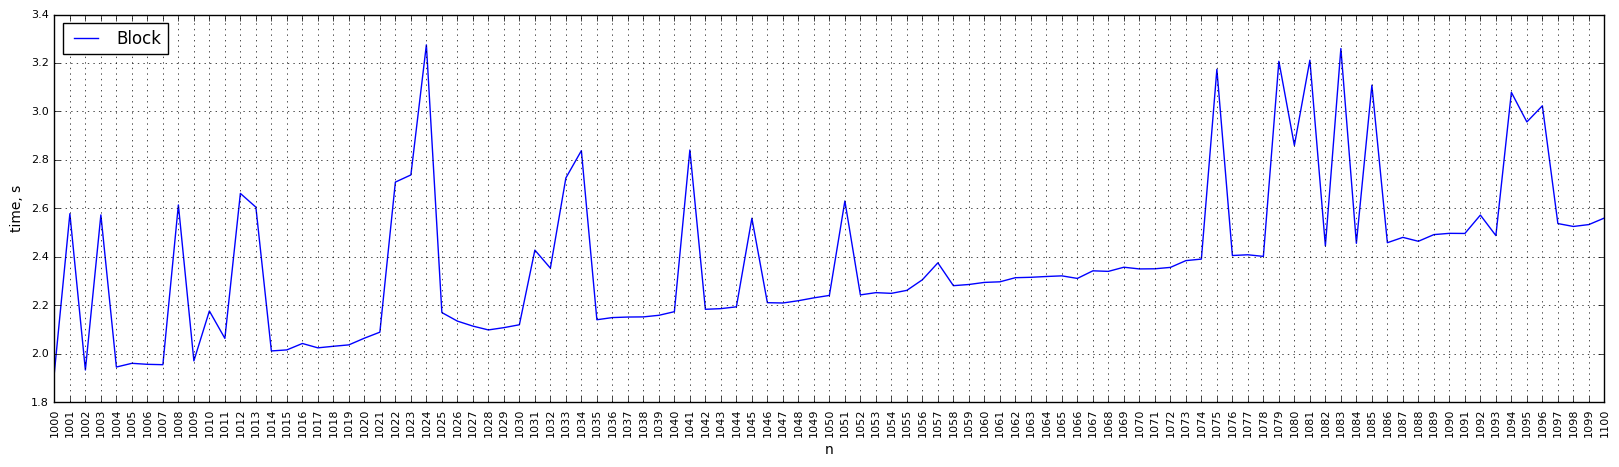

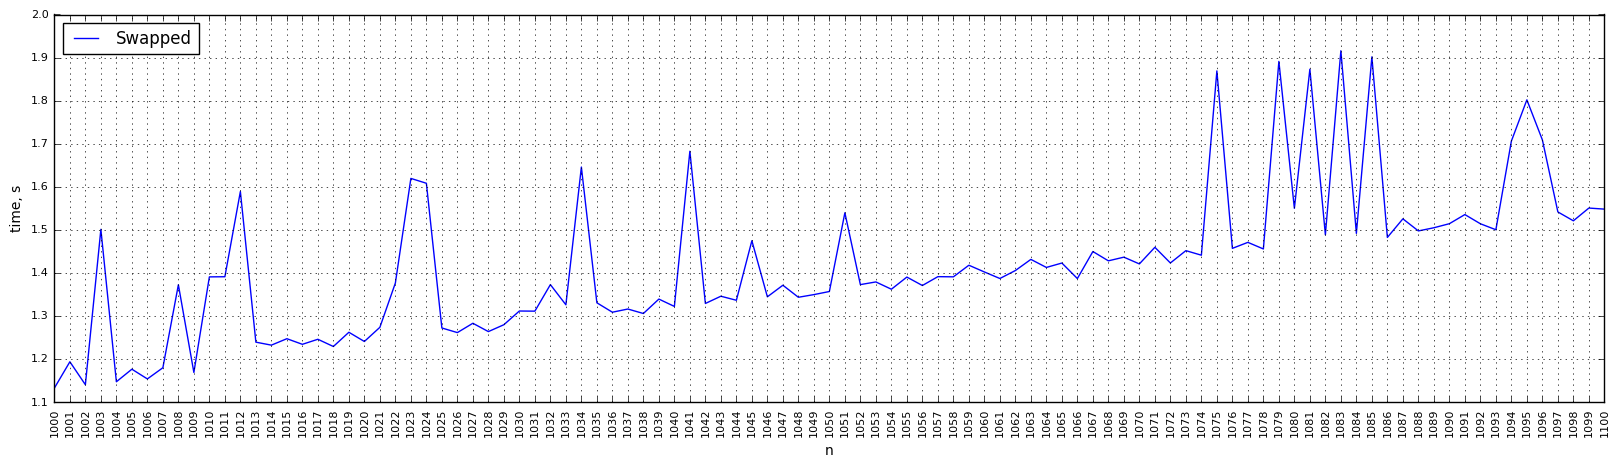

In [5]:
run("../logs/linux-1000-1100-float.log")

### 2. FLOAT from 1000 to 2000

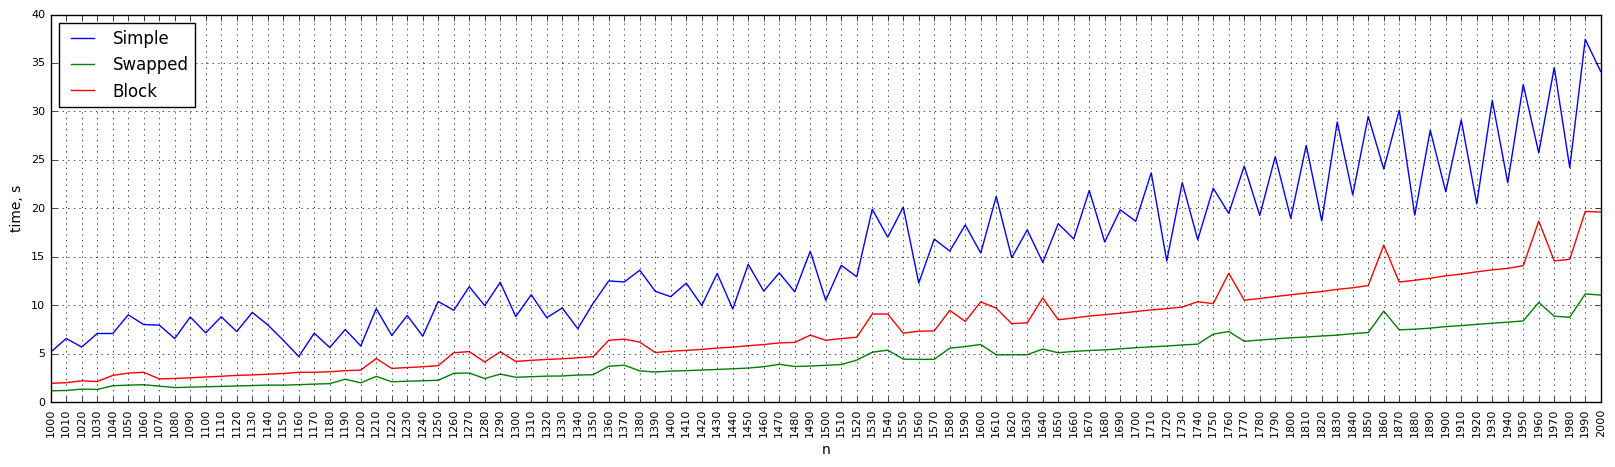

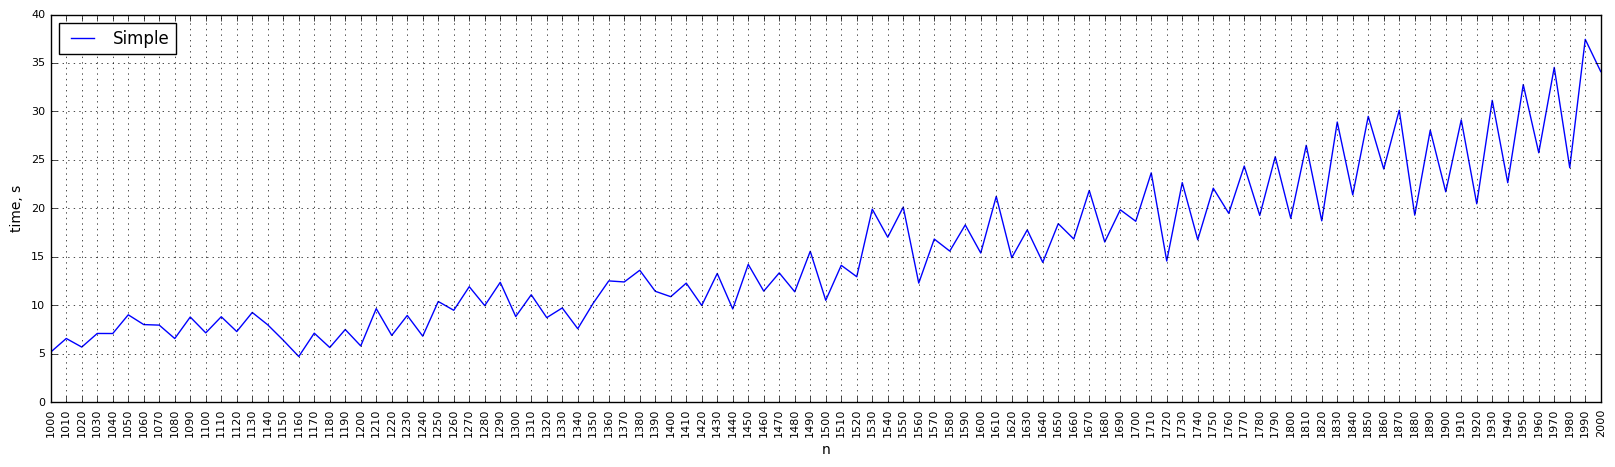

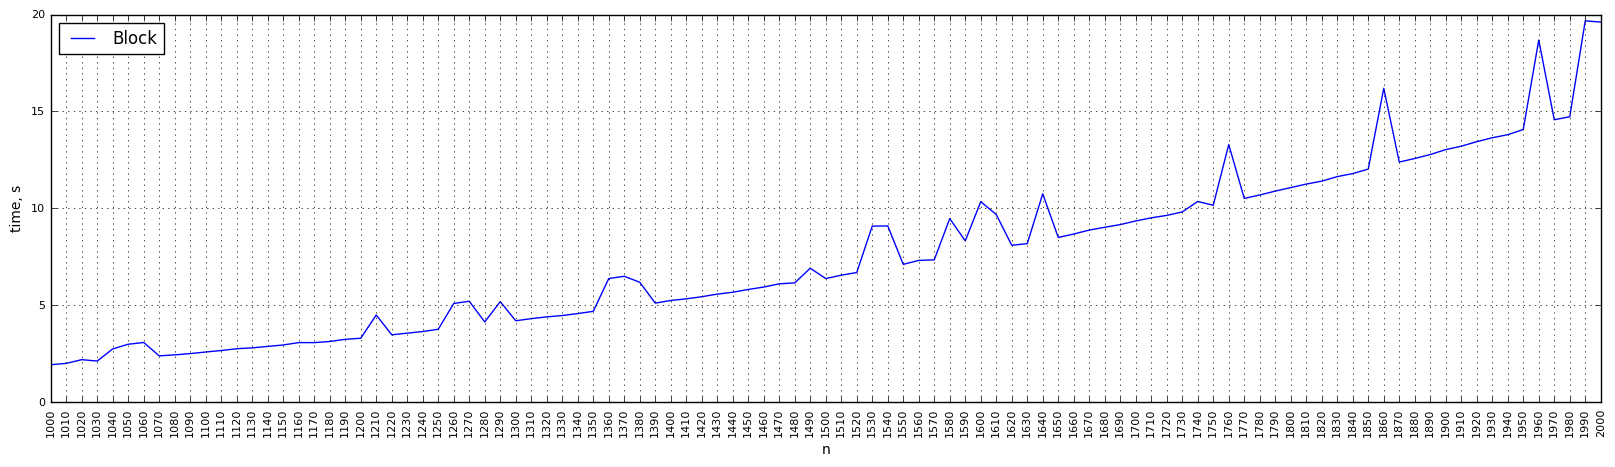

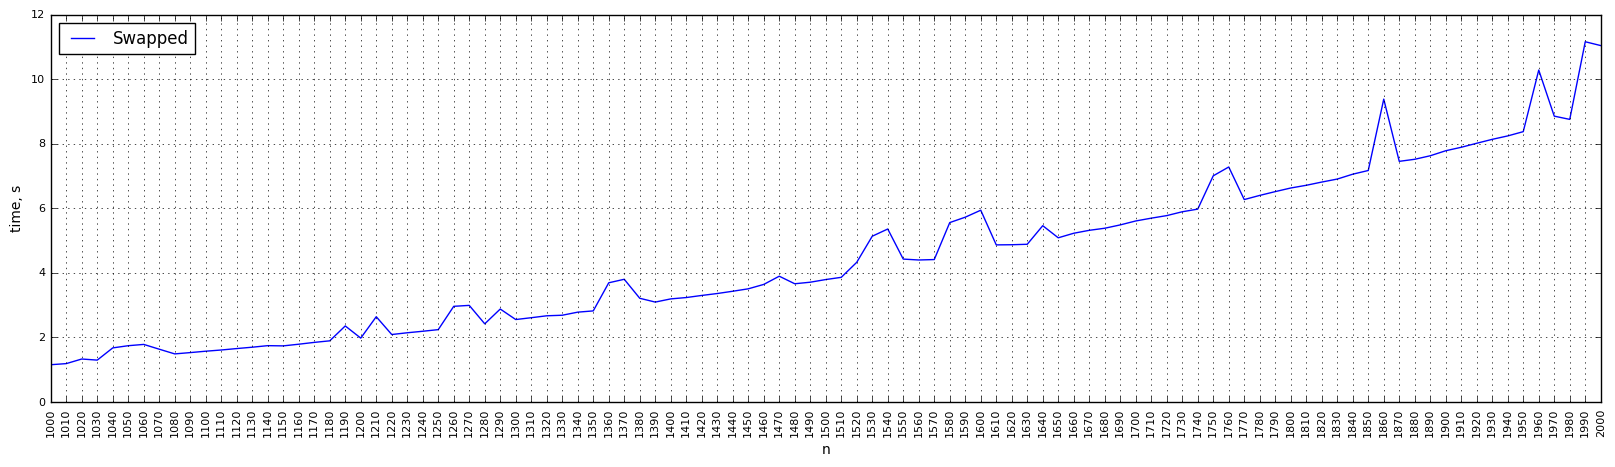

In [6]:
run("../logs/linux-1000-2000-float.log")

### 3. DOUBLE from 1000 to 1100

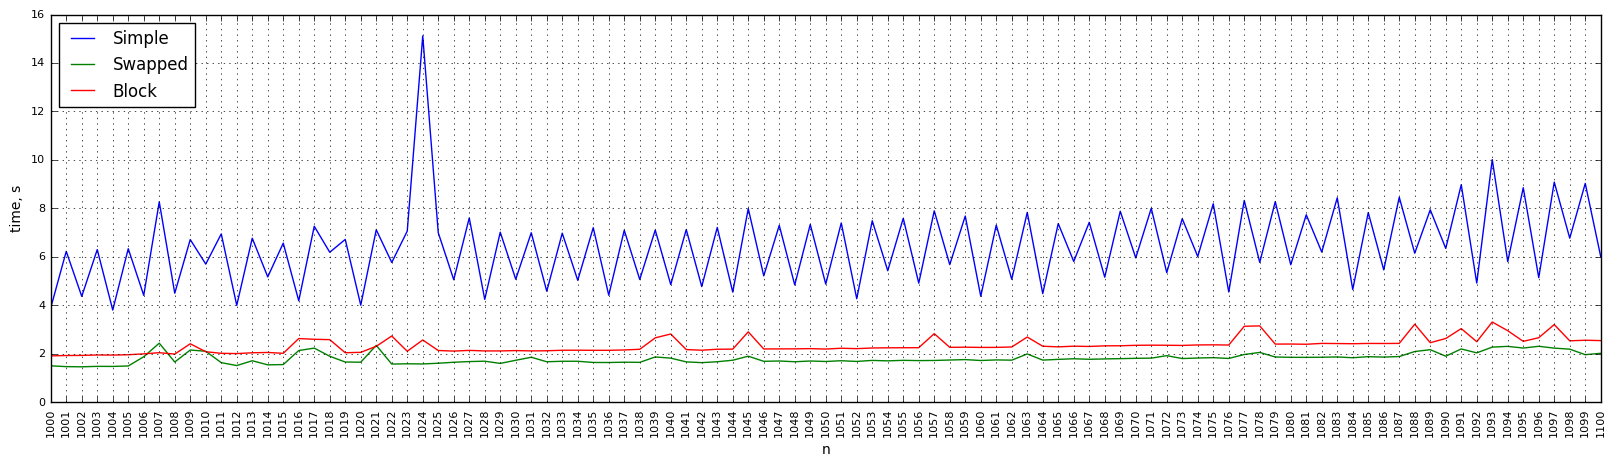

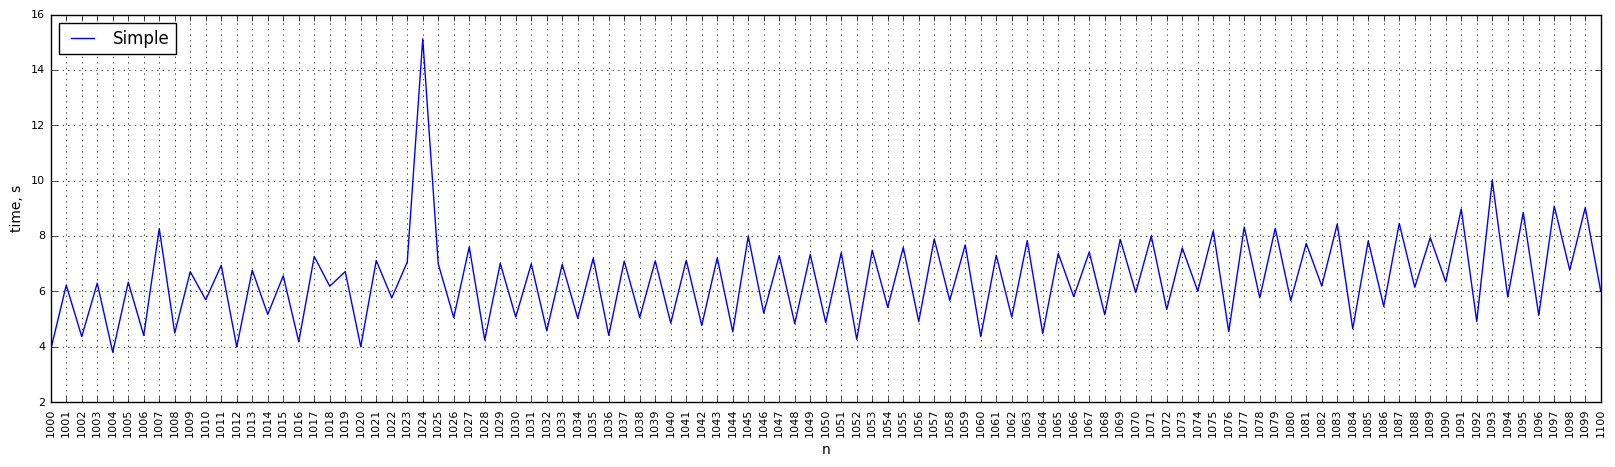

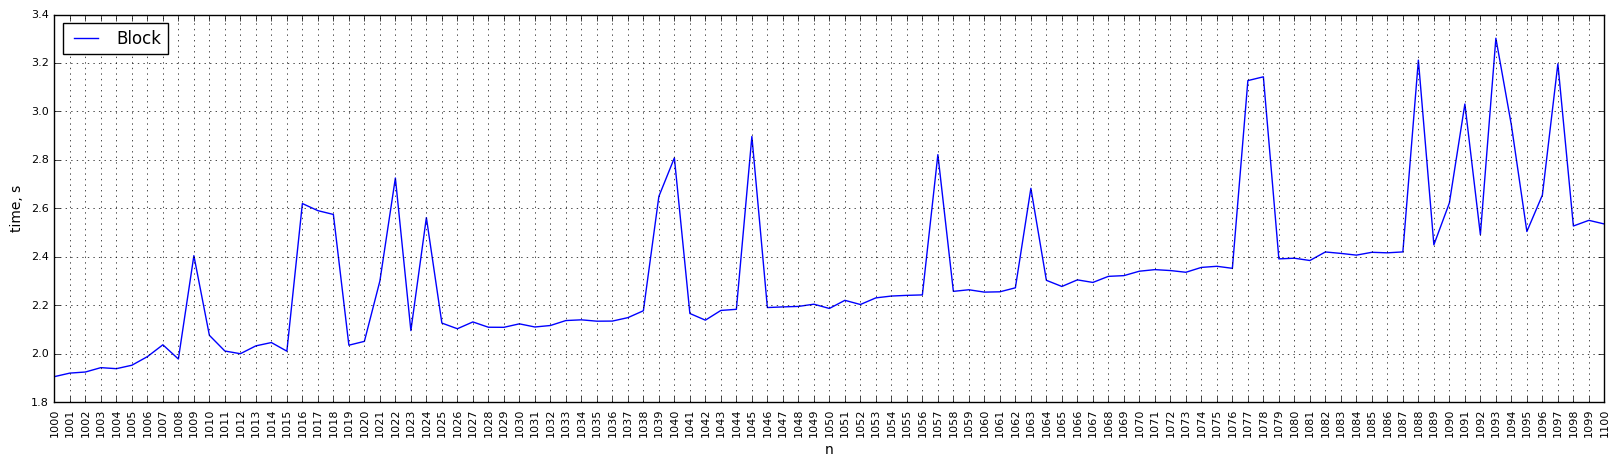

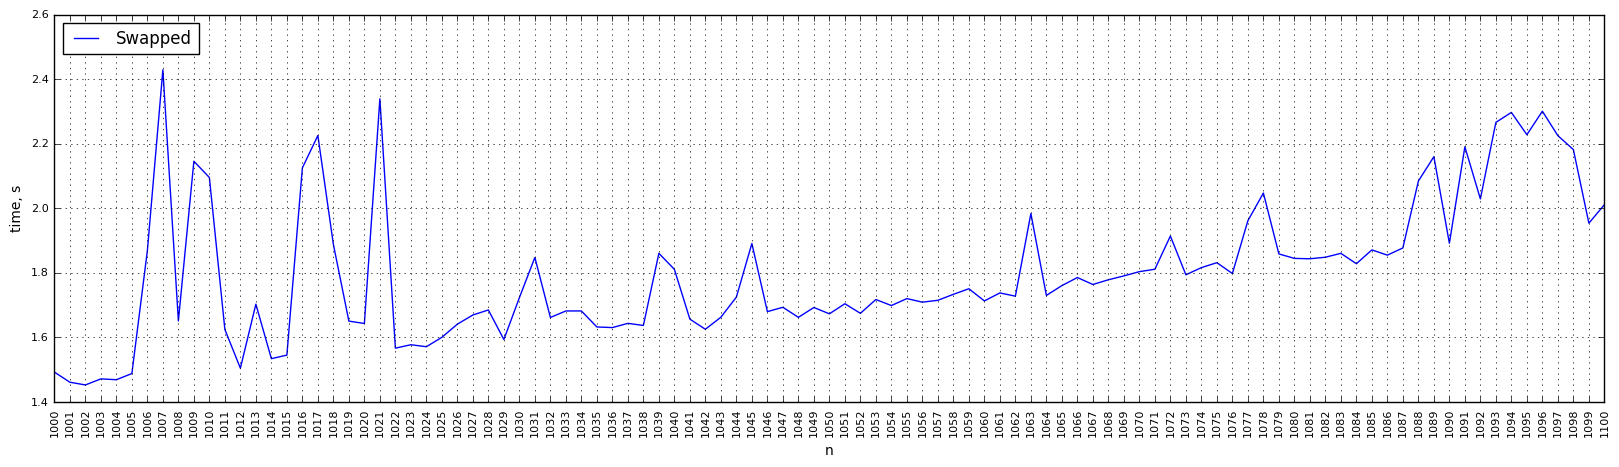

In [8]:
run("../logs/linux-1000-1100-double.log")

### 4. DOUBLE from 1000 to 2000

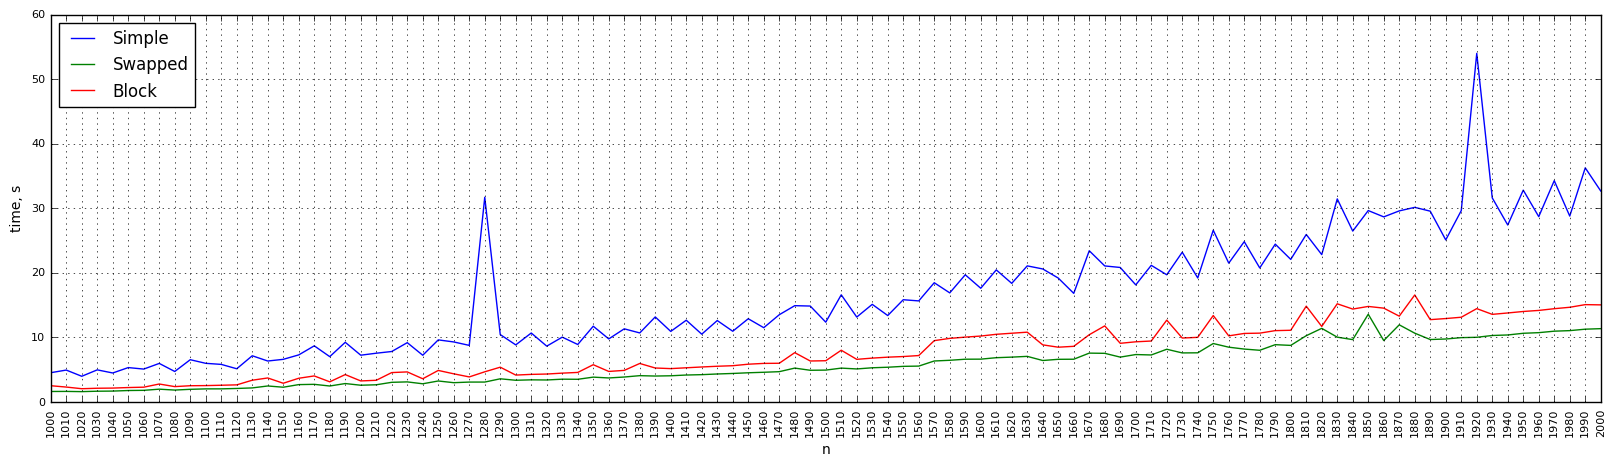

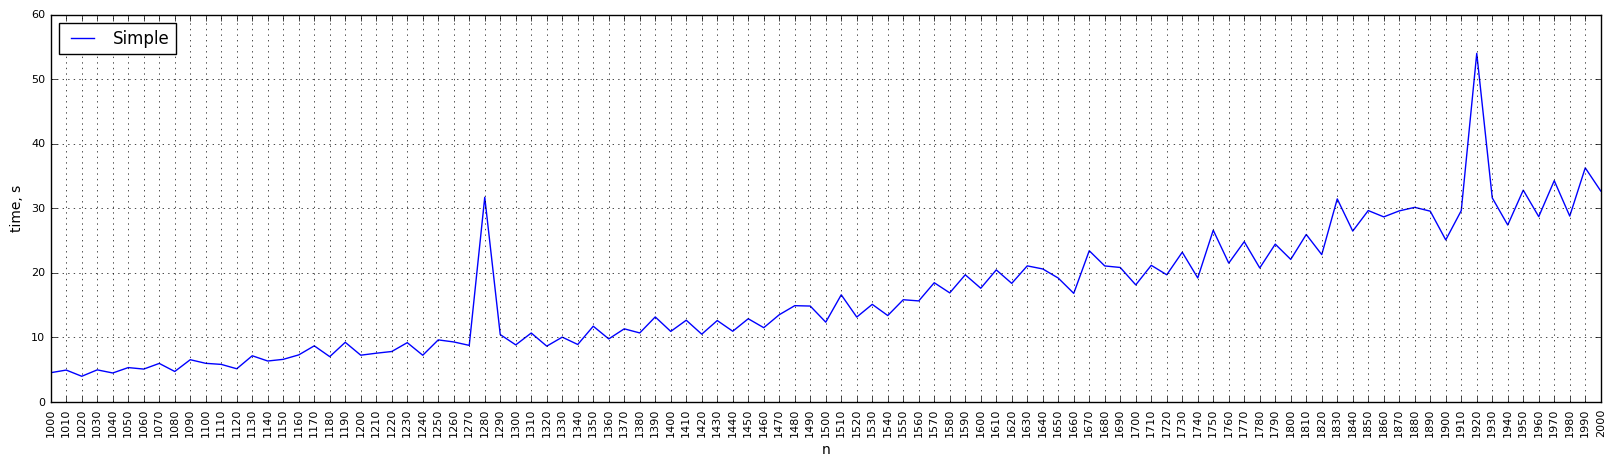

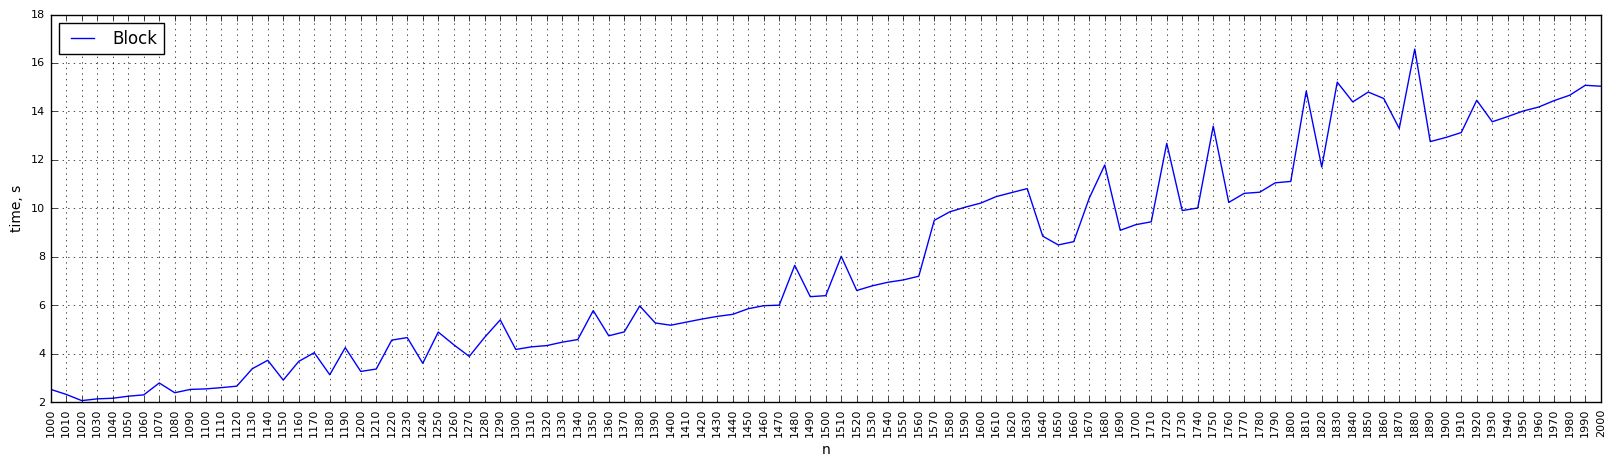

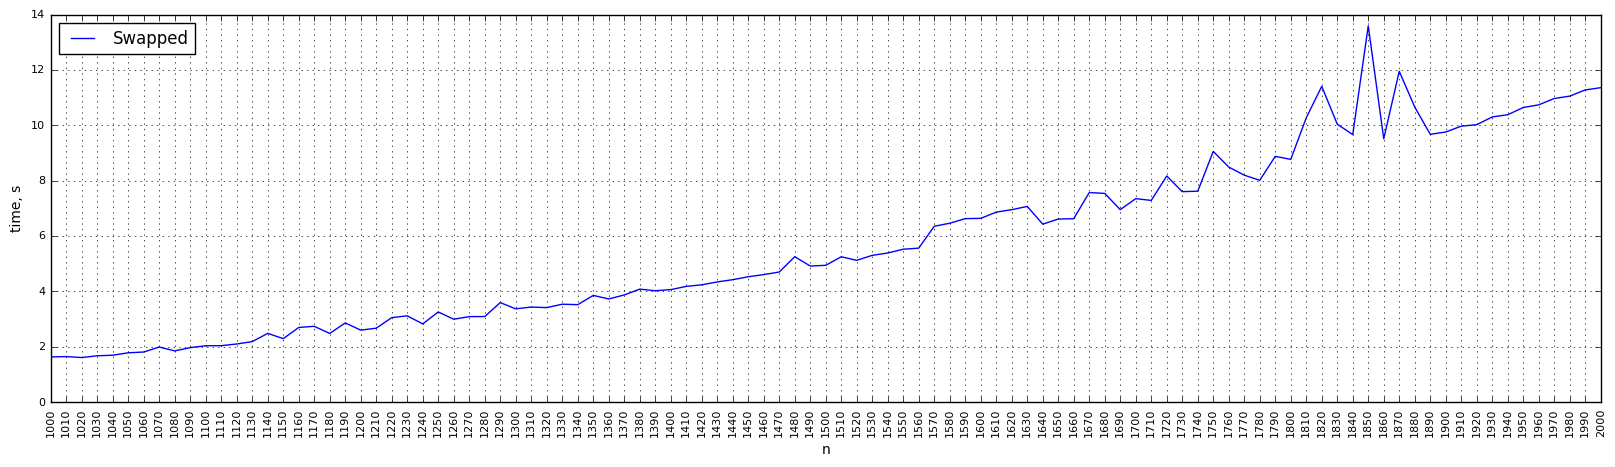

In [10]:
run("../logs/linux-1000-2000-double.log")

### OS X

### 1. FLOAT from 1000 to 1100

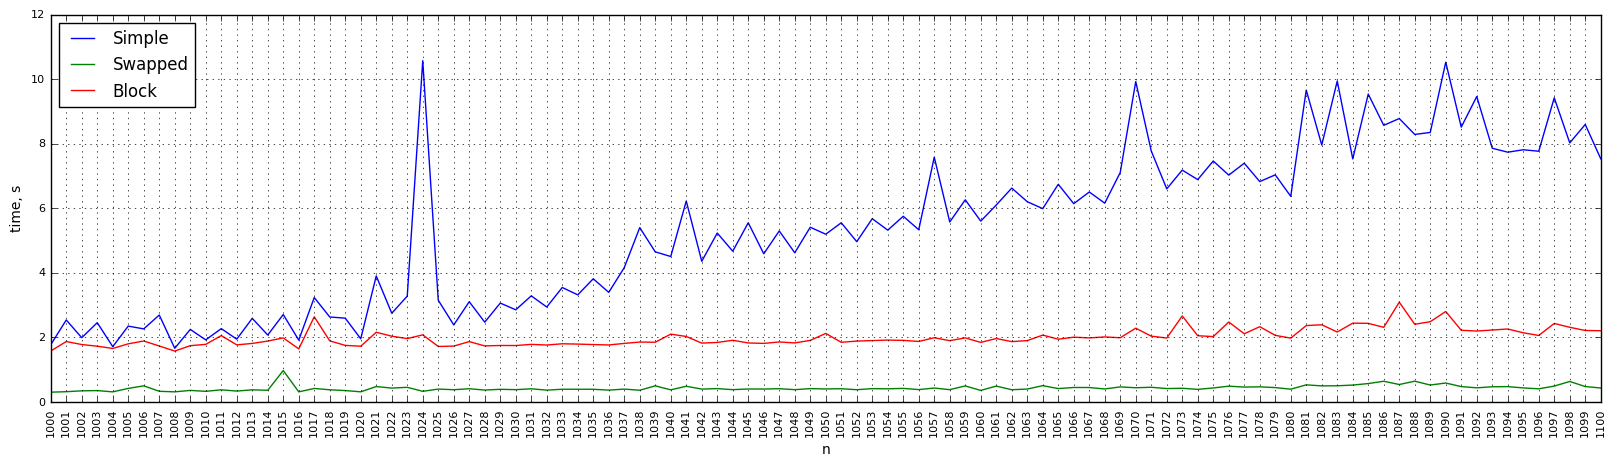

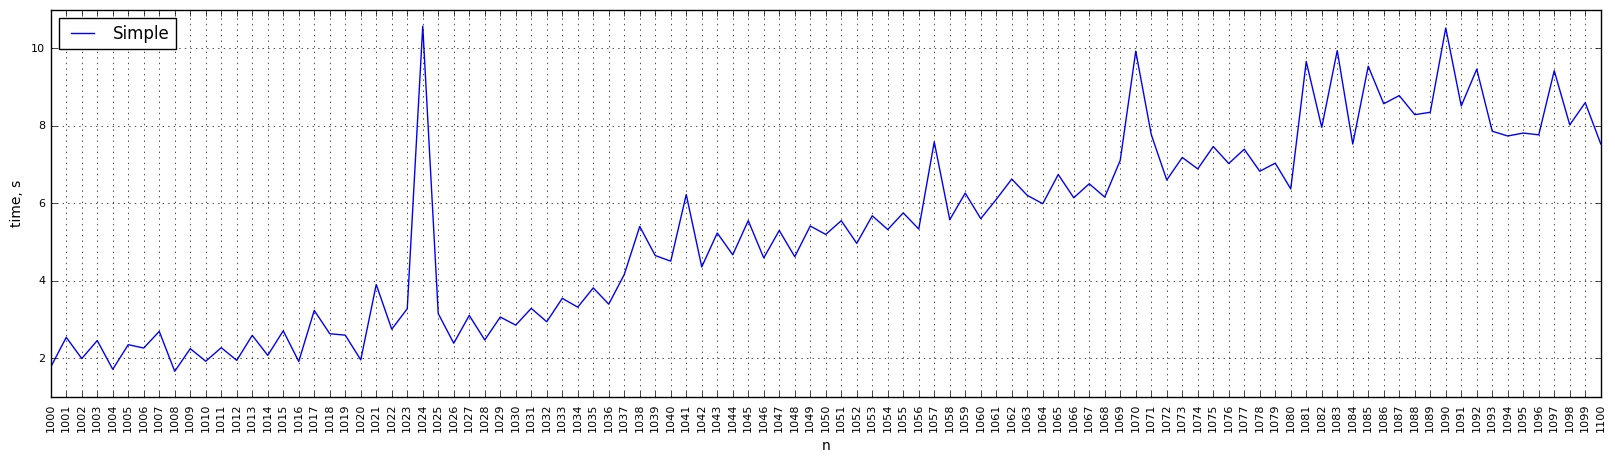

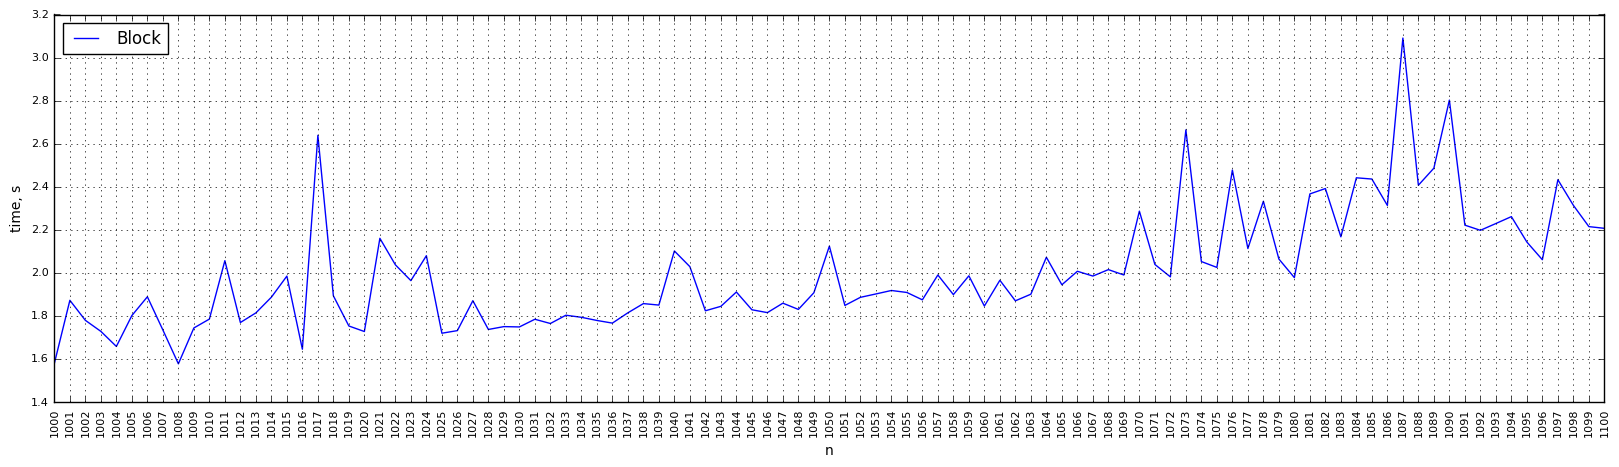

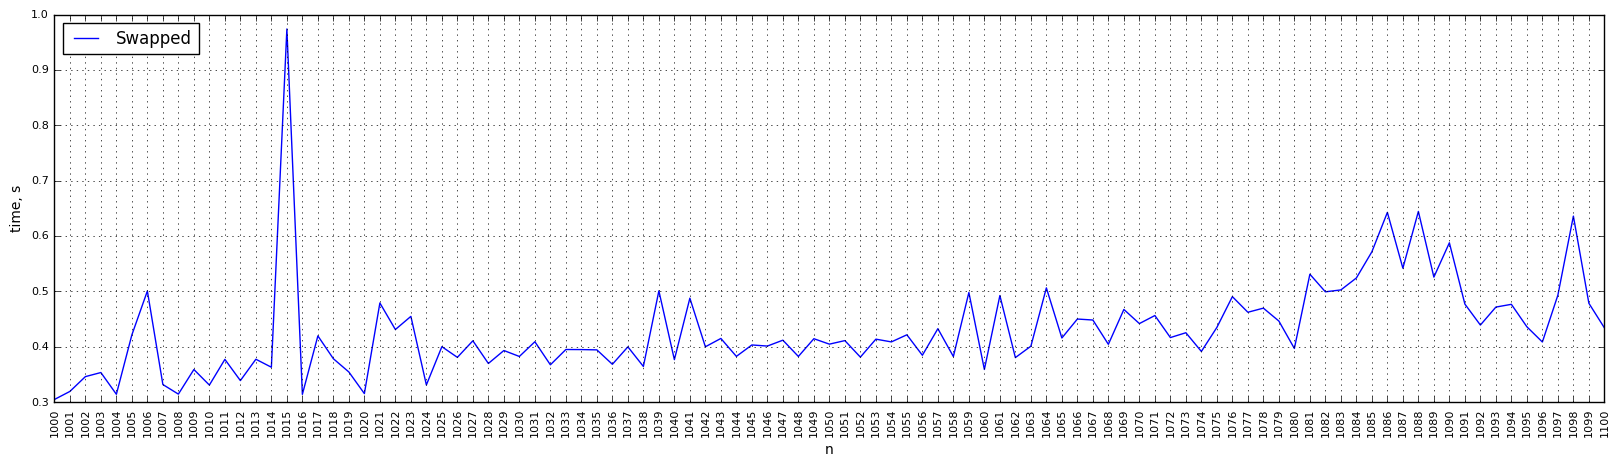

In [11]:
run("../logs/mac-1000-1100-float.log")

### 2. FLOAT from 1000 to 2000

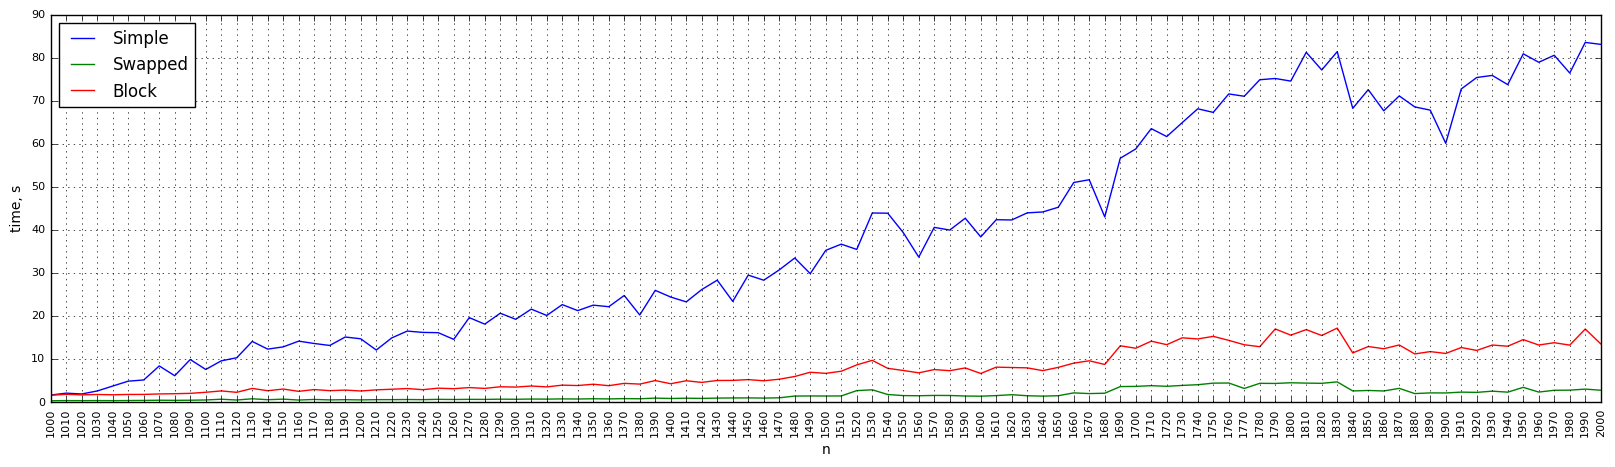

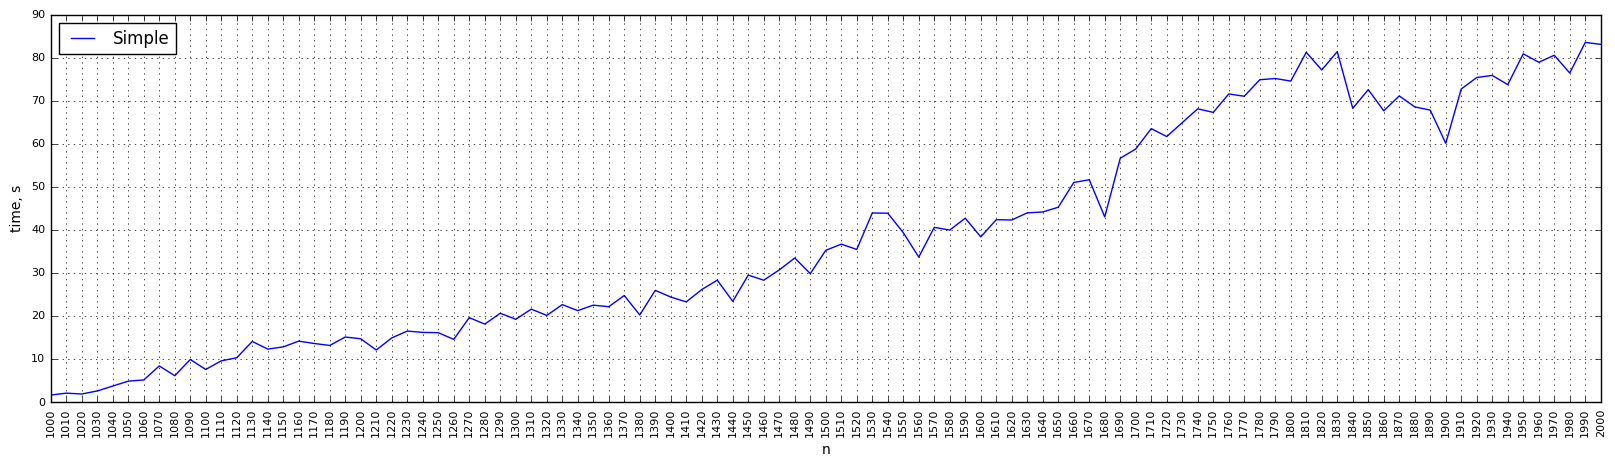

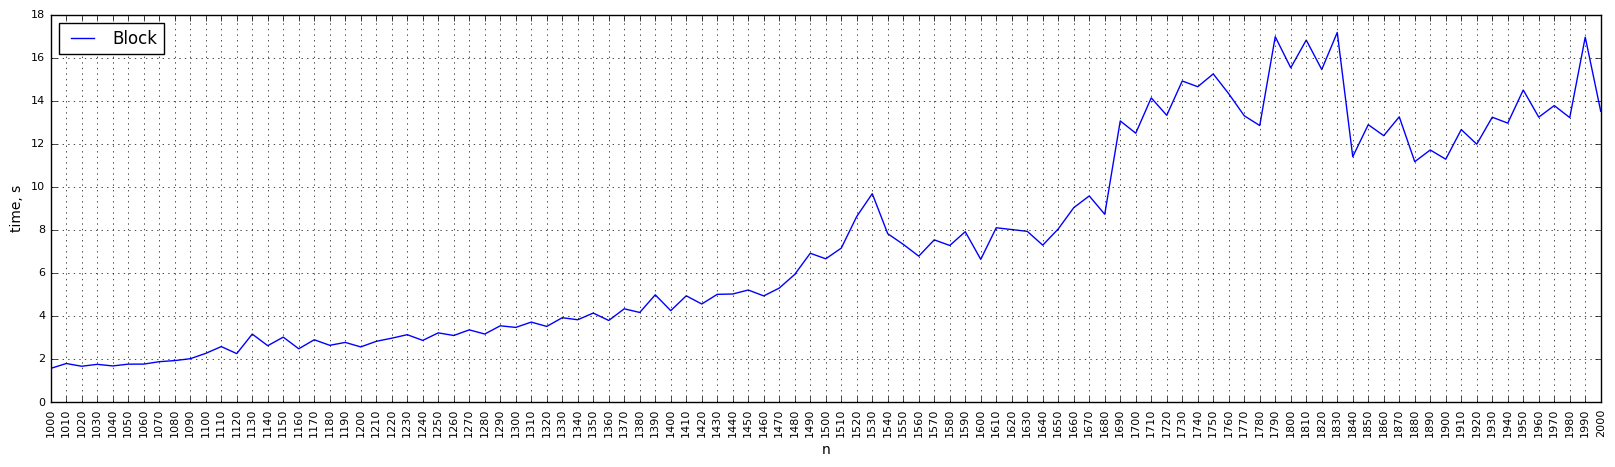

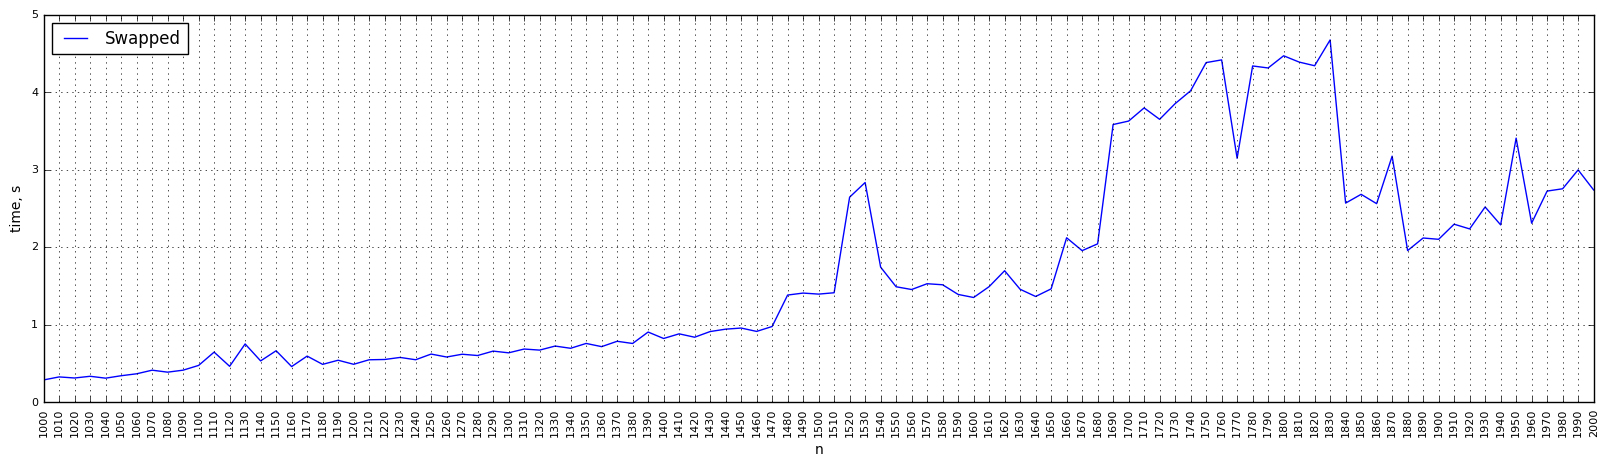

In [12]:
run("../logs/mac-1000-2000-float.log")

### 3. DOUBLE from 1000 to 1100

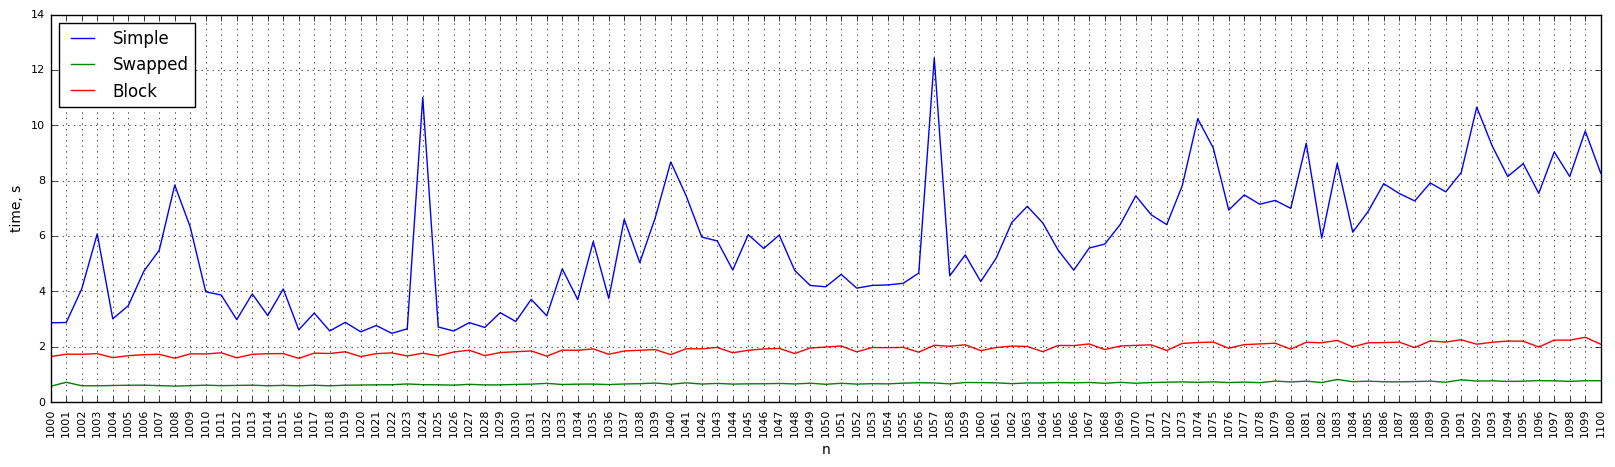

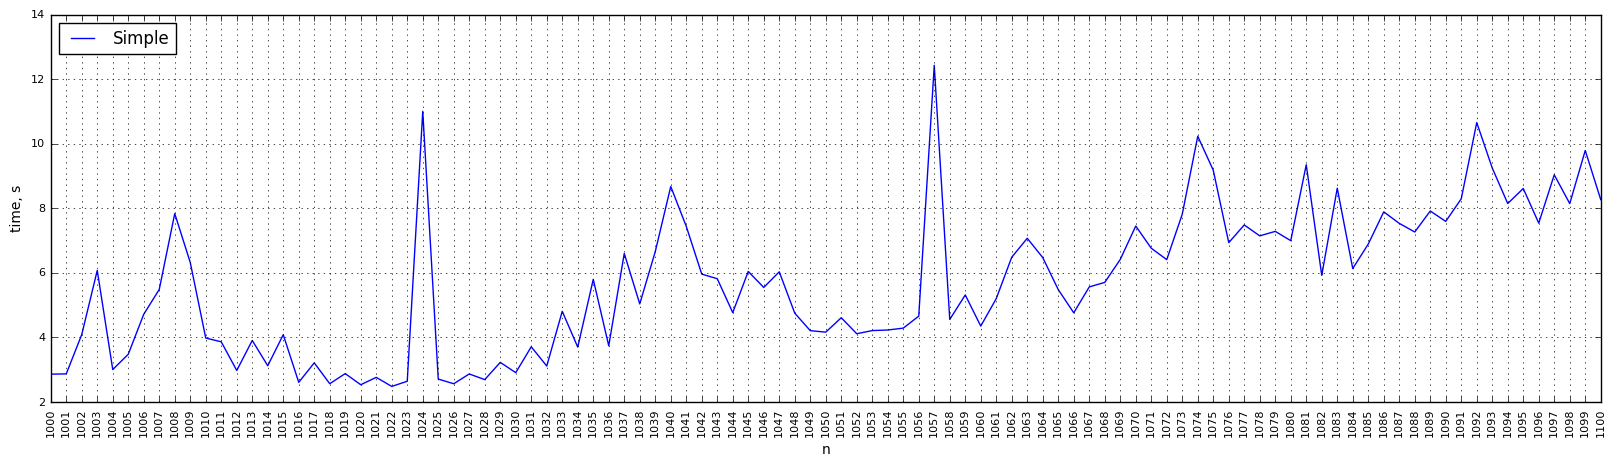

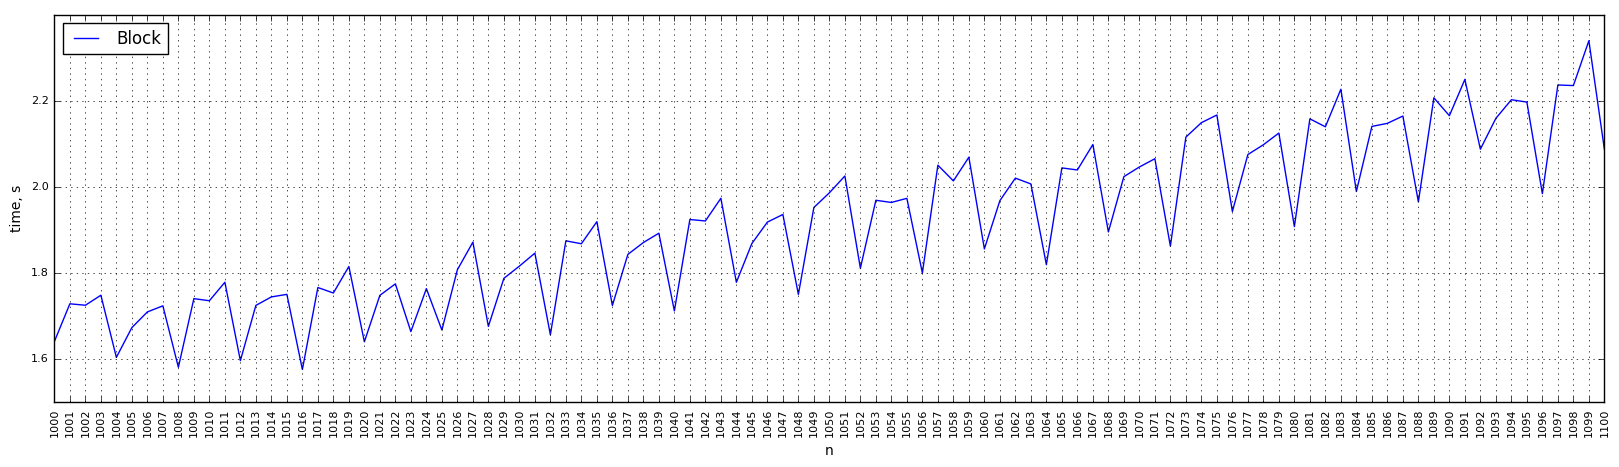

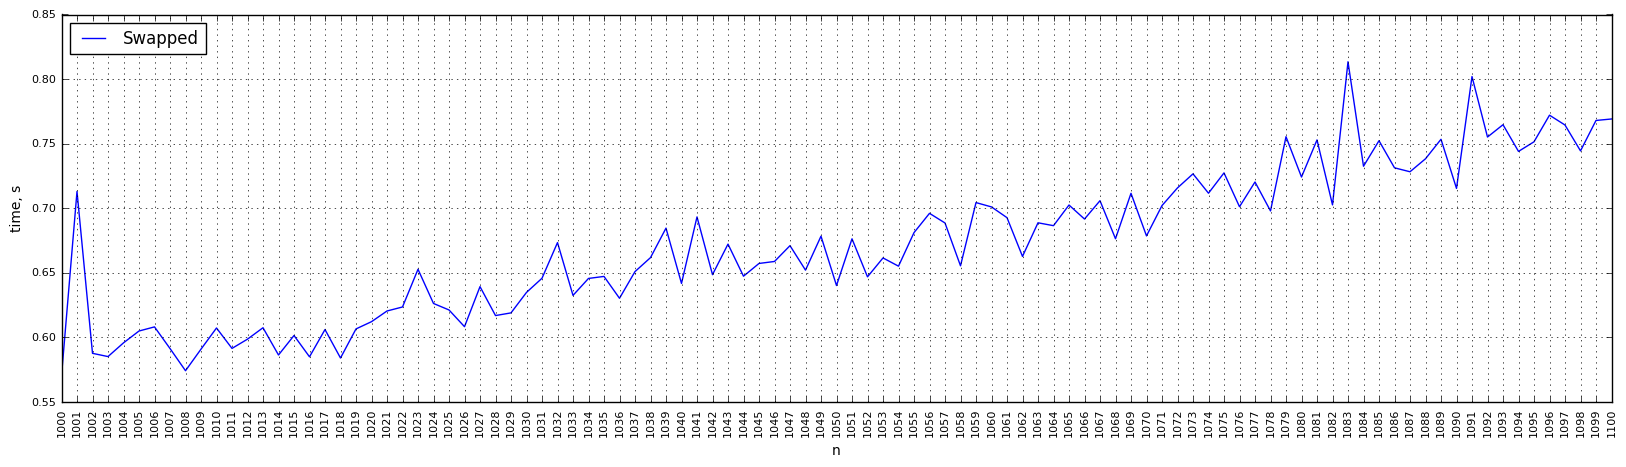

In [15]:
run("../logs/mac-1000-1100-double.log")

### 4. DOUBLE from 1000 to 2000

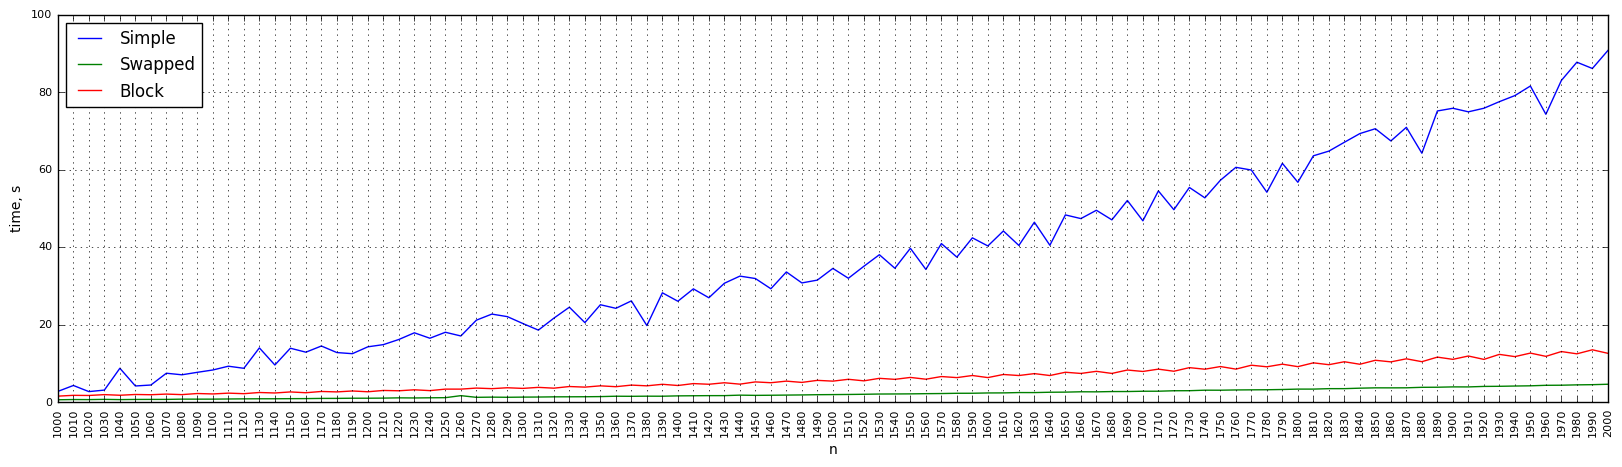

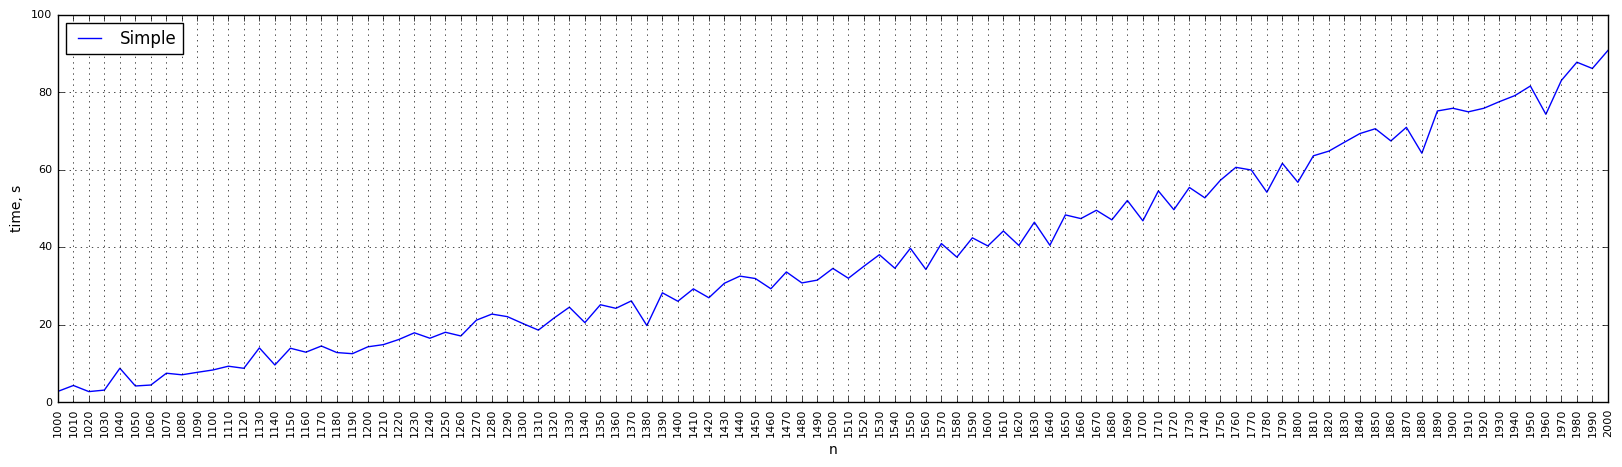

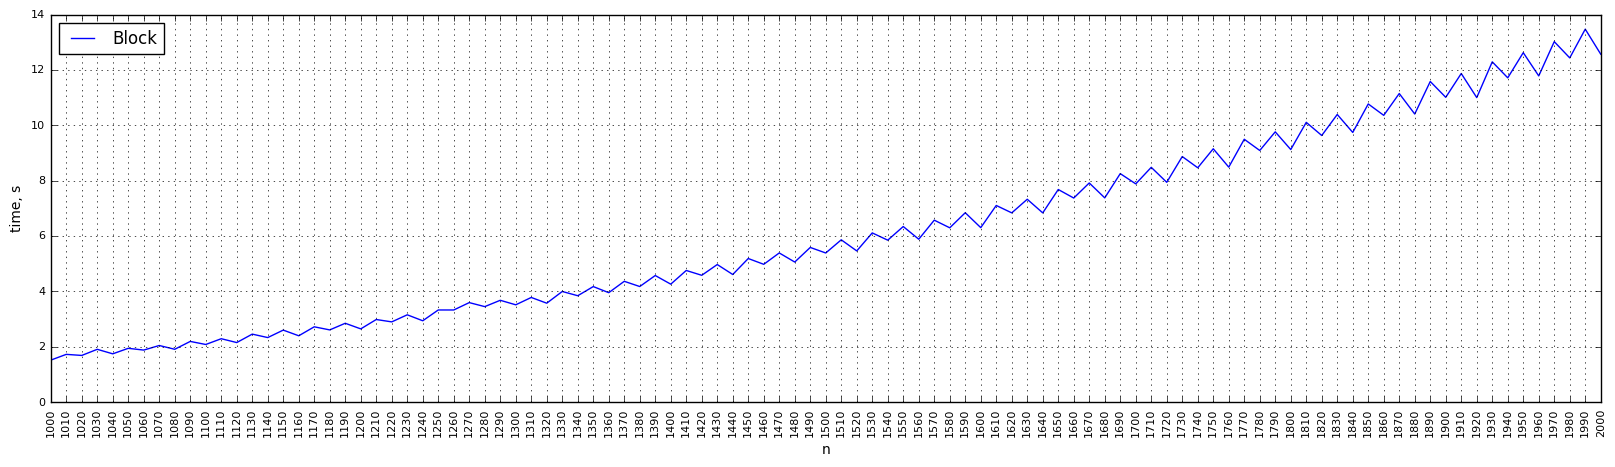

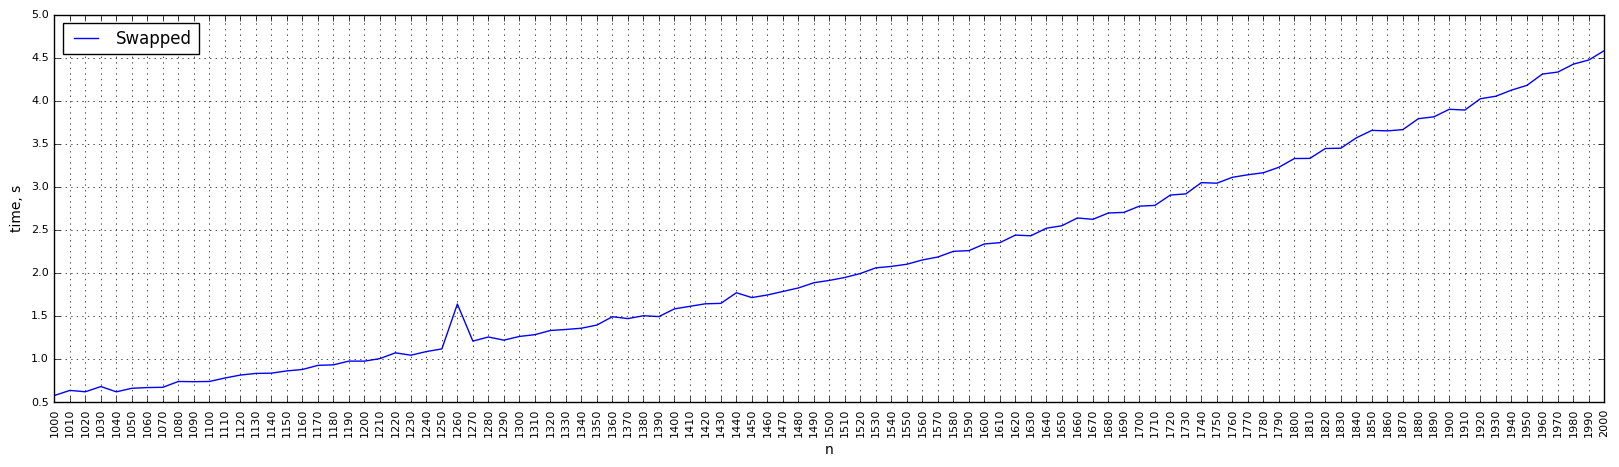

In [16]:
run("../logs/mac-1000-2000-double.log")

## Вывод

Время выполнения Simple алгоритма при размере матрицы n=1024 резко увеличивается при том, что при n=1025 время выполнения снова становится нормальным. Приведем объяснение данному поведению.

Уточним некоторые характеристики кэша L1 (32KB, 8-канальный, 64B - размер кэш-линии), которые нам пригодятся в дальнейшем.
    
        32КВ / 64В = 512 (столько блоков помещается в кэше)
    
        512 / 8 = 128 (столько блоков помещается в одном канале (сэте) кэша)
        
        64В / 4В = 16 (столько подряд идущих float-элементов строки матрицы помещается в одном блоке)
        
        64В / 8В = 8 (столько подряд идущих double-элементов строки матрицы помещается в одном блоке)
        
        1024 / 16 = 64 (количество кэш-линий, занимаемых одной строкой float-матрицы n=1024)
        
        1024 / 8 = 128 (количество кэш-линий, занимаемых одной строкой double-матрицы n=1024)
        
Один канал кэша вмещает в себя 128 блоков с уникальными тэгами адреса, т.е. каждый блок в оперативной памяти условно имеет тэг адреса от 0 до 127, т.е. начиная со 128-го блока тэги начнут повторяться, т.е. у 128-го блока в опертивной памяти тэг адреса будет 0, у 129-го - 1, и т.д. Однако кэш имеет 8 каналов, что позволяет хранить в кэше одновременно 8 блоков с одинаковым тэгом (по одному в каждом канале) без перетирания. 
    
Так как одна строка float-матрицы состоит из **ровно** 64 блоков, то если положим, что первый блок 1-ой строки имеет номер 0, то первый блок 2-ой строки имеет номер 64, 3-ей строки - номер 128 и т.д.
    
При обыкновенном перемножении float-матриц обращение к элементам второй матрицы (матрицы B) происходит по столбцам. Таким образом, при обращении к элементу второй матрицы B[0][0] в кэш заносится кэш-линия с условным номером 0. Пр обращении к B[1][0] в кэш заносится кэш-линия с номером 64, B[2][0] - с номером 128, B[3][0] - с номером 256, и т.д. Тэги адресов у блоков с данными элементами будут следующими (**нужный элемент всегда будет самый первый из 16 float чисел в блоке**):
    
    * B[0][0] - 0 (0 mod 128)
    * B[1][0] - 64 (64 mod 128)
    * B[2][0] - 0 (128 mod 128)
    * B[3][0] - 64 (192 mod 128)
    * B[4][0] - 0 (256 mod 128)
    * и т.д.
    
Несложно заметить, что уже начиная с обращения к B[16][0] кэшу придется вытеснять ранее сохраненные кэш-линии (следует из 8-канальности), при этом так ниразу к ним и не обратившись (не было ни одного кэш-попадания). Также стоит заметить, что в данном случае кэш способен хранить только 16 блоков с элементами столбца матрицы B из 512 возможных (вероятнее всего, в данном случае кэш будет заполнен в основном блоками с элементами матрицы А). При умножении double-матриц количество хранимых блоков уменьшается до 8, однако картина будет принипиально та же, что и с float-матрицами. 
 
Если рассмотреть матрицу A, то ситуация будет несравнимо лучше. При обращении к А, чтение происходит по строке, т.е обратившись к А[0][0] в оперативной памяти, в кэш попадут первые 16 элементов первой строки, которые будут использоваться при следущих обращениях к А. Таким образом на 1 кэш-промах будет приходится 15 кэш-попаданий.

Для сравнения рассмотрим n = 1025:

      1025 / 16 = 65 - количество кэш-линий, требуемых для одной строкой float-матрицы n=1025

Однако, в данном случае 65-ая кэш-линия будет содержать только, например, один последний элемент первой строки матрицы В и 15 первых элементов второй строки. На тэгах адресов у блоков это отразится следующим образом:

    * B[0][0] - 0 (0 mod 128)
    * B[1][0] - 64 (64 mod 128)
    * B[2][0] - 0
    * ...
    * B[14][0] - 0 (896 mod 128)
    * B[15][0] - 64 (960 mod 128)
    * B[16][0] - 1 (1025 mod 128)
    * B[17][0] - 65 (1089 mod 128)
    * B[18][0] - 1 (1153 mod 128)
    * B[19][0] - 65 (1217 mod 128)
    * ...
    * B[1021][0] - 127 
    * B[1022][0] - 63 
    * B[1023][0] - 127
  
  Т.е до B[15][0] процесс заполнения кэша происходит как и при n=1024, однако номер блока с B[16][0] будет не 1024, как ранее, а 1025. Это произошло из-за того, что для того, чтобы уместить последний 1025-ый элемент строки в оперативной памяти, он помещается в новый блок, который продолжает заполняться уже элементами следующей строки. Как следствие, первый элемент каждой следующей строки смещается на одну позицию в последнем блоке. Так как таких позиций 16 (блок вмещает 16 float-чисел), то после каждой 16 строки матрицы общее количество заполненых блоков увеличивается, и следовательно адрес индекса блока также увеличивается на единицу. Благодаря этому блоки заполняют кэш полнее, что значительно увеличивает вероятность кэш-попаданий, что подтверждено результатами эксперимента.
  
  Метод Block не обладает таким изъяном, так как его основная цель увеличить локальность данных, что достигается путем перемножения не по всей строке-столбцу, а блоками. Такой блок (в предоставленной реализации размер блока - 10 х 10) полностью помещается в кэше, что увеличивает количество кэш-попаданий. Однако следует добавить, что выбор оптимального размера блока также может значительно улучшить скорость вычисления.
  
  Метод Swapped проявил себя еще лучше, так как этот метод для перемножения элементов матриц "ходит" по строкам как матрицы А так и матрицы B. На каждой итерации также происходит сдвиг индекса вычисляемого элемента матрицы С, однако этот сдвиг тоже проходит последовательно по строке, что не практически не влият на итоговую производительность. 
  
 На результаты экспериментов также влияет многоуровневость кэшей процессора: L1, L2 у первой машины под управлением Linux, и L1, L2, L3 у второй машины.

  
        